## Become familiar with the dataset
The Following describe the datasets variables:
* CRIM - per capita crime rate by town

* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

* INDUS - proportion of non-retail business acres per town.

* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

* NOX - nitric oxides concentration (parts per 10 million)

* RM - average number of rooms per dwelling

* AGE - proportion of owner-occupied units built prior to 1940

* DIS - weighted distances to five Boston employment centres

* RAD - index of accessibility to radial highways

* TAX - full-value property-tax rate per $10,000

* PTRATIO - pupil-teacher ratio by town

* LSTAT - % lower status of the population

* MEDV - Median value of owner-occupied homes in $1000's



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(5)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


### 1. Create a Box plot for the Median Value of Owner Occupied Homes

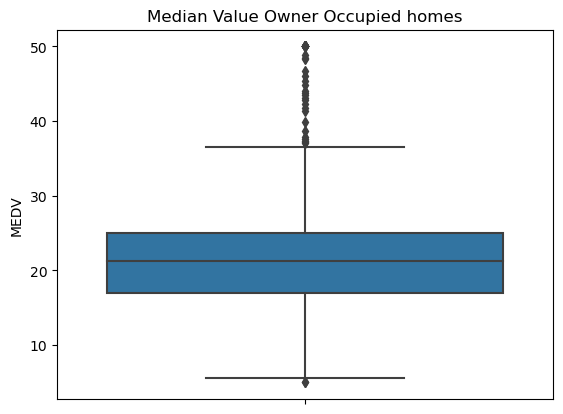

In [5]:
# For the "Median value of owner-occupied homes" provide a boxplot
ax = sns.boxplot(y="MEDV", data=boston_df)
ax.set_title ('Median Value Owner Occupied homes')
plt.show()

**Conclusion:** the boxplot suggests that the median value of owner occupied homes is between 50,000  and 100,000, but there is a large range of values in the data and there are a few outliers.

### 2. Create a Bar plot for the Charlse River Variable

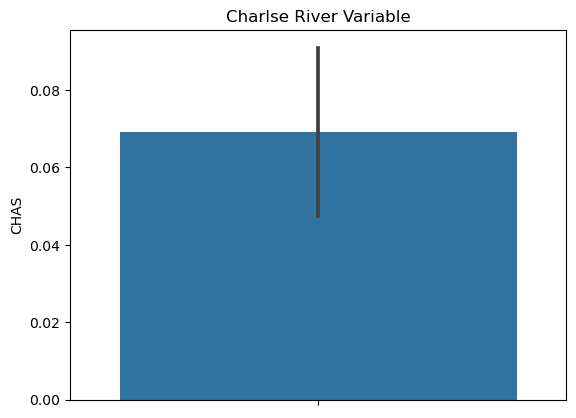

In [6]:
# Provide a  bar plot for the Charles river variable
ax = sns.barplot( y="CHAS", data=boston_df)
ax.set_title("Charlse River Variable")
plt.show()

**Conclusion:** the barplot suggests that Charles River has been increasing steadily over the years shown, with a possible slight decrease in 2005.

### 3. Create a boxplot for the MEDV variable vs the AGE variable.

In [7]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 
#(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'AGE_GROUP'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 years and older'

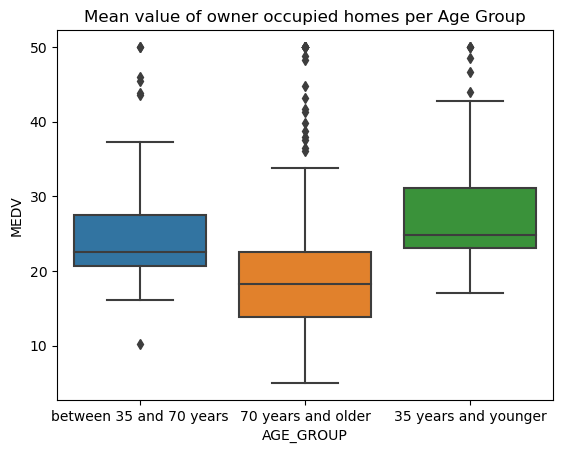

In [8]:
# Provide a boxplot for the MEDV variable vs the AGE variable.
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

ax = sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df)
ax.set_title("Mean value of owner occupied homes per Age Group")
plt.show()

**Conclusion**: the boxplot suggests that the mean value of owner-occupied homes is higher for older age groups and that there is more variability in the mean value of owner-occupied homes for younger age groups.

### 4. Create a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

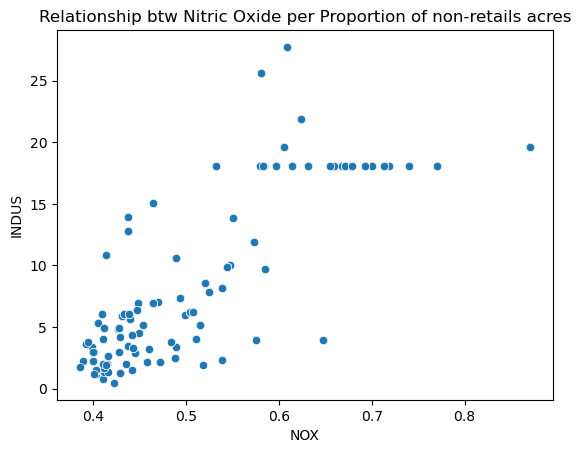

In [9]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. 
# What can you say about the relationship?

ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set_title("Relationship btw Nitric Oxide per Proportion of non-retails acres")
plt.show()

**Conclusion:** the scatterplot suggests that there is a positive correlation between nitric oxide per portion of non-retail acres and nitric oxide per portion of non-retail acres. However, the strength of the correlation is moderate and there are a few outliers in the data.

### 5.  Create a histogram for the pupil to teacher ratio variable

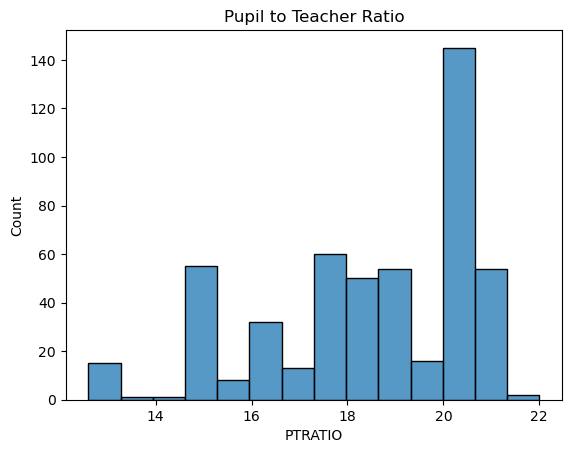

In [10]:
 # Create a histogram for the pupil to teacher ratio variable
ax = sns.histplot(boston_df['PTRATIO'])
ax.set_title("Pupil to Teacher Ratio")
plt.show()
    

**Conclusion:** the histogram suggests that the most common pupil-to-teacher ratio in the dataset is 20, but there is a range of pupil-to-teacher ratios from 14 to 22. The distribution of the pupil-to-teacher ratio is right-skewed.


### 6.  Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of house bounded by the Charlse River")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of house bounded by the Charlse River")

Test for Equality of Variance

In [11]:
scipy.stats.levene(boston_df['MEDV'],
                   boston_df['CHAS'], center='mean')
# since the p-value is less than 0.05 we can assume no equality of variance

LeveneResult(statistic=532.6811164157666, pvalue=5.402535119732986e-95)

Use the <code>ttest_ind</code> from the <code>scipy_stats</code> library

In [12]:
scipy.stats.ttest_ind(boston_df['MEDV'],
                   boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis there is a signficant difference in median value of house by the Charlse river


### 7. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value for each proportion of owner occupied units built prior to 1940 (AGE) ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value for each proportion of owner occupied units built prior to 1940 (AGE)")

Test for Equality of Variance

In [13]:
scipy.stats.levene(boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is greater than 0.05, the variance are equal, for the purposes of this exercise, we will move along

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [14]:
thirtyfive_lower = boston_df[boston_df['AGE_GROUP'] == '35 years and younger']['MEDV']
thirtyfive_seventy =  boston_df[boston_df['AGE_GROUP'] == 'between 35 and 70 years']['MEDV']
seventy_above =  boston_df[boston_df['AGE_GROUP'] == '70 years and older']['MEDV']

In [15]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_above)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis there is a signficant difference in median value for each proportion of owner occupied units built prior to 1940 (AGE)

 ### 8. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town ")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a  relationship between Nitric oxide concentrations and proportion of non-retail business acres per town")

Since they are both continuous variables we can use a pearson correlation test and draw a scatter plot


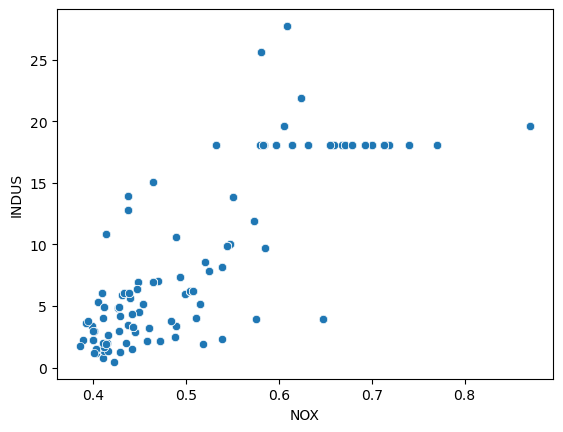

In [16]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.show()

**Conclusion:** the scatterplot suggests that there is a positive correlation between nitric oxide per portion of non-retail acres and nitric oxide per portion of non-retail acres. However, the strength of the correlation is moderate and there are a few outliers in the data.

Let Test for Pearson Correlation

In [17]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209151, pvalue=7.913361061239527e-98)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis, and there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town as also agree with the scatterplot

### 9. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

State the Hypothesis
*   $H\_0: β1$ = 0 ( weighted distance to the five Boston employment centres did not have impact on the median value of owner occupied homes )
*   $H\_1: β1$ is not equal to 0 (weighted distance to the five Boston employment centres did have impact on the median value of owner occupied homes )

In [18]:
## insert code here
X = boston_df['DIS']
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 23 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        06:22:40   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis, weighted distance to the five Boston employment centres did have impact on the median value of owner occupied homes, which means tehre is significant relationship between them

**Coefficients:** DIS = 1.0916: This indicates that for every one unit increase in DIS, MEDV is expected to increase by 1.0916, holding all other variables constant.